Stock Prediction

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./Datasets/MSFT.csv")

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060337,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058692,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057046,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058143,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.059788,22752000


Text(0, 0.5, 'Price')

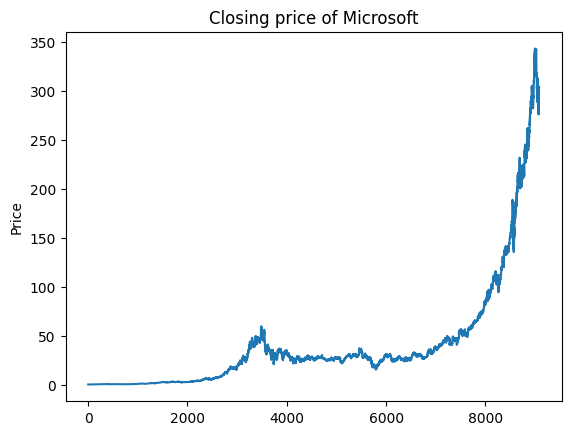

In [11]:
#visualize the closing price history
plt.title("Closing price of Microsoft")
plt.plot(df["Close"])
plt.ylabel("Price")

In [15]:
data = df.filter(["Close"])
print(data)
dataset = data.values
print(dataset)

           Close
0       0.097222
1       0.100694
2       0.102431
3       0.099826
4       0.098090
...          ...
9078  300.429993
9079  299.160004
9080  304.059998
9081  299.489990
9082  304.100006

[9083 rows x 1 columns]
[[9.72220000e-02]
 [1.00694000e-01]
 [1.02431000e-01]
 ...
 [3.04059998e+02]
 [2.99489990e+02]
 [3.04100006e+02]]


In [45]:
import math
training_len = math.ceil(len(dataset)*.8)
training_len

7267

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [50]:
scaled_data

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       ...,
       [ 4.39991192],
       [ 4.32337683],
       [ 4.40058194]])

In [51]:
train_data = scaled_data[0:training_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [52]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7207, 60, 1)

In [54]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7207, 60, 1)

In [56]:
model = Sequential()
model.add(LSTM(200,return_sequences=True, input_shape=(x_train.shape[1],1))) 
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100)) #dense layers is used to connect the neurons in the network to each other  
model.add(Dense(50))
model.add(Dense(1))

In [59]:
model.compile(optimizer = "adam" , loss ="mean_squared_error", metrics = ["accuracy"])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(x_train , y_train , epochs= 5)

Epoch 1/5
226/226 [==============================] - 125s 554ms/step - loss: 1.7385e-04 - accuracy: 0.0000e+00
Epoch 2/5
226/226 [==============================] - 125s 552ms/step - loss: 1.5690e-04 - accuracy: 0.0000e+00
Epoch 3/5
226/226 [==============================] - 127s 564ms/step - loss: 1.5862e-04 - accuracy: 0.0000e+00
Epoch 4/5
226/226 [==============================] - 122s 540ms/step - loss: 1.2989e-04 - accuracy: 0.0000e+00
Epoch 5/5
226/226 [==============================] - 104s 461ms/step - loss: 1.2817e-04 - accuracy: 0.0000e+00
